# **T1 - T2 - T3**

theta (LR):	 [ 0.96551392  5.05153814 -4.00489622  7.02109756  1.99768997 -0.10373533]
MSE on train data (LR):  1.413678666632854
MSE on test data (LR):  1.492184610253


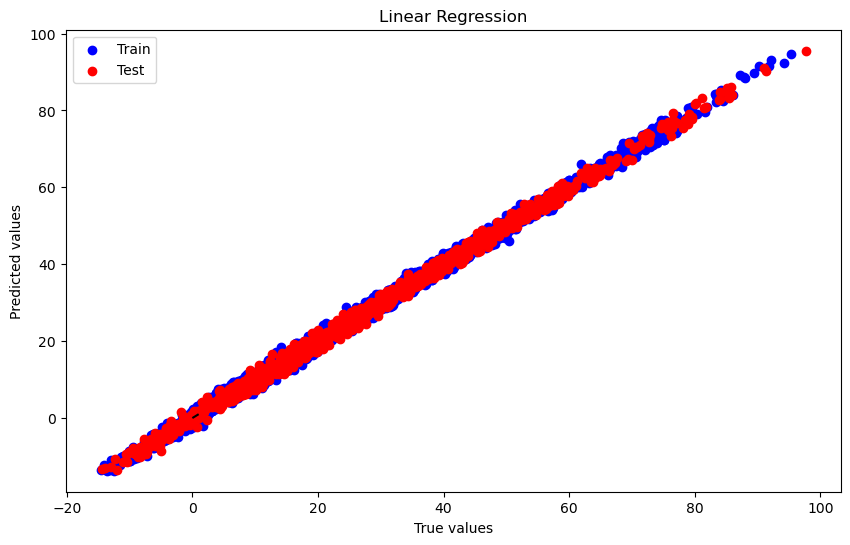

Mean Squared Error Train (LASSO): 1.4199913215139273
Mean Squared Error Test (LASSO): 1.4871383636362798
Coefficients (LASSO): [ 4.98415594 -3.99716425  6.89221153  1.99614542 -0.        ]
Intercept (LASSO): 1.027447554020437
Mean Squared Error Train (RF): 0.32822538273709256
Mean Squared Error Test (RF): 2.22142197503892


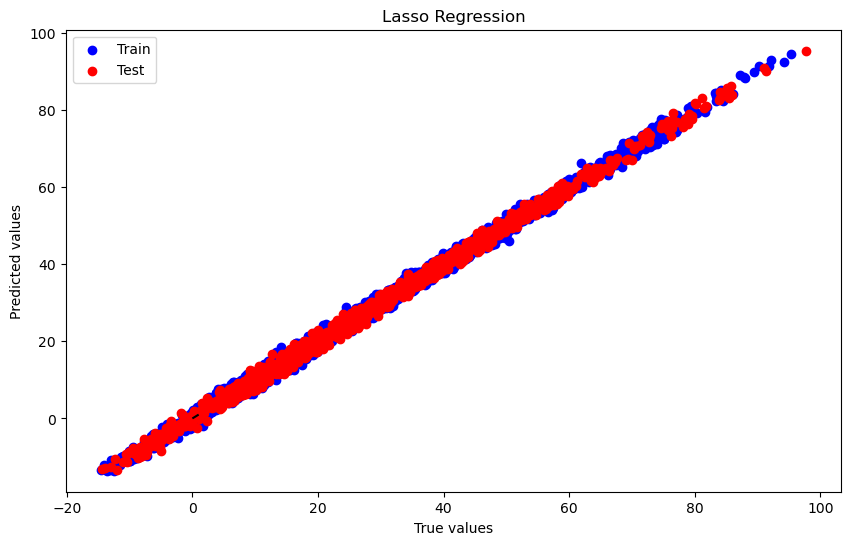

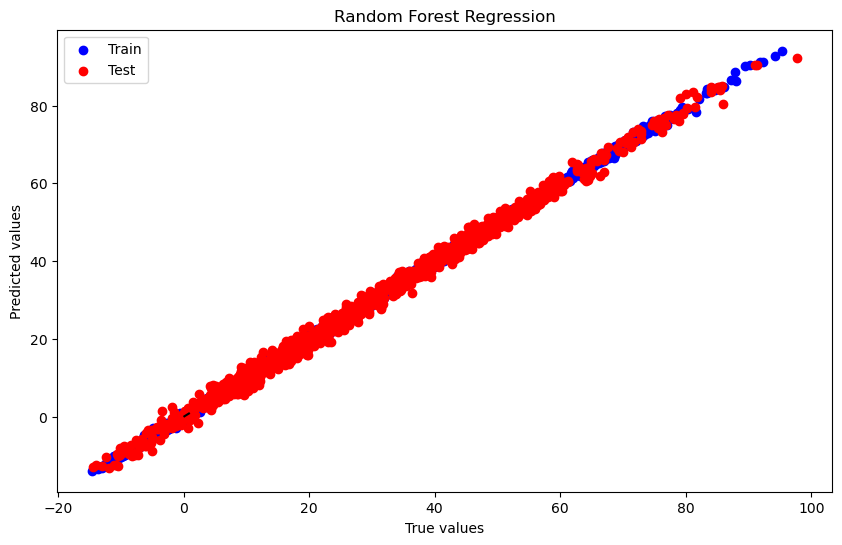

T-statistic: -1.7142774704113708, P-value: 0.0867362138390338
There is no statistically significant difference between the two models.


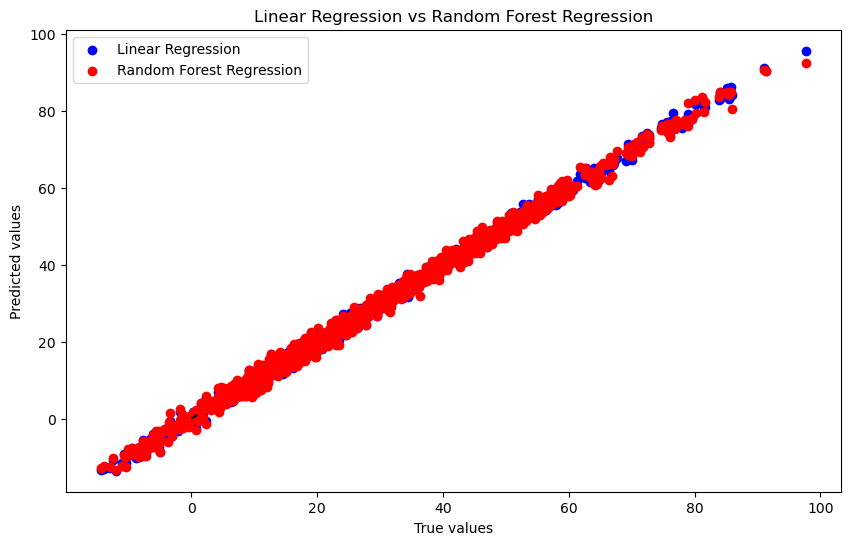

/Users/apple/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/apple/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.2620 - val_loss: 0.6650
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7007 - val_loss: 0.6273
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6883 - val_loss: 0.5839
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6281 - val_loss: 0.5100
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5636 - val_loss: 0.5070
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4717 - val_loss: 0.4596
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4092 - val_loss: 0.4252
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4532 - val_loss: 0.4311
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3694 - val_loss: 0.3477
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3208 - val_loss: 0.2941
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2773 - val_loss: 0.2696
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [1]:
# Import libraries
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load data 
url = 'https://drive.switch.ch/index.php/s/37RuoA3Mgt9Rqah/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
y = data.f.y

# T1 (THETA ESTIMATES) 
arrayX1, arrayX2 = np.hsplit(x, 2)
coseno_arrayX1 = np.cos(arrayX1)
arrayX2_squared = np.square(arrayX2)
arrayX1_tanh = np.tanh(arrayX1)
new_array = np.concatenate((arrayX1, arrayX2, coseno_arrayX1, arrayX2_squared, arrayX1_tanh), axis=1)

data = np.hstack((new_array, y.reshape(-1, 1)))

# Split data into train and test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, train_size=0.7, shuffle=True, random_state=0)
#print('train_data shape:', train.shape)
#print('test_data shape:', test.shape)

# Divide input data (x) and labels (y)
x_train = train[:, 0:5]
y_train = train[:, -1]
x_test = test[:, 0:5]
y_test = test[:, -1]

# Solve the linear system with np.linalg.solve()
ones_column = np.ones(shape=(len(x_train), 1))
X = np.hstack((ones_column, x_train))
theta_hat = np.linalg.solve(a=X.T.dot(X), b=X.T.dot(y_train))   # Solves ax = b with respect to x
#print('Input (X) shape:\t', X.shape)
print('theta (LR):\t', theta_hat)

#####################################################################################################################################
# T1 (MSE) 

# Solve the linear system with LinearRegression
from sklearn.linear_model import LinearRegression
# initiate the model
lr = LinearRegression(fit_intercept=False)
# estimate parameters
lr.fit(X, y_train)
theta_hat2 = lr.coef_
#print('theta_hat2 = \t{}'.format(theta_hat2))

# Use LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train)
# Numerically validate the results
y_train_pred_lr = lr.predict(x_train)
mse_train_performance_lr = mean_squared_error(y_train_pred_lr, y_train)
# Numerically validate the results
y_test_pred_lr = lr.predict(x_test)
mse_test_performance_lr = mean_squared_error(y_test_pred_lr, y_test)

print('MSE on train data (LR): ', mse_train_performance_lr)
print('MSE on test data (LR): ', mse_test_performance_lr)

# plot the result
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_lr, label='Train', color='blue')
plt.scatter(y_test, y_test_pred_lr, label='Test', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.legend()
plt.show()

#####################################################################################################################################
#T1 (LASSO REGRESSION)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.03)

lasso.fit(x_train, y_train)

y_pred_test = lasso.predict(x_test)
y_pred_train = lasso.predict(x_train)

mse = mean_squared_error(y_test, y_pred_test)
mse1 = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train (LASSO):", mse1)
print("Mean Squared Error Test (LASSO):", mse)

coefficients = lasso.coef_
intercept = lasso.intercept_
print("Coefficients (LASSO):", coefficients)
print("Intercept (LASSO):", intercept)

#plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Train', color='blue')
plt.scatter(y_test, y_pred_test, label='Test', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Lasso Regression')
plt.legend()

#####################################################################################################################################
#####################################################################################################################################
# T2 (RANDOM FOREST)
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#import numpy as np

# Creating and fitting the Random Forest Regressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=0)
random_forest.fit(x_train, y_train)

# Predicting on the test set
y_test_pred_rf = random_forest.predict(x_test)
y_train_pred_rf = random_forest.predict(x_train)

# Calculating Mean Squared Error
mse_train_performance_rf = mean_squared_error(y_train, y_train_pred_rf)
print("Mean Squared Error Train (RF):", mse_train_performance_rf)
mse_test_performance_rf = mean_squared_error(y_test, y_test_pred_rf)
print("Mean Squared Error Test (RF):", mse_test_performance_rf)

#plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_rf, label='Train', color='blue')
plt.scatter(y_test, y_test_pred_rf, label='Test', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

# T2 (WHICH MODEL IS STATISTICALLY BETTER BETWEEN LINEAR MODEL AND NON LINEAR MODEL?)
# Linear regression part
#x_train, x_test, y_train, y_test = train_test_split(data, shuffle=True, train_size=0.7, random_state=0)
y_test_pred_lr = lr.predict(x_test)
mse_test_performance_lr = mean_squared_error(y_test,y_test_pred_lr)
res_lr = y_test - y_test_pred_lr

# Random forest regression part
#x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)
y_test_pred_rf = random_forest.predict(x_test)
mse_rf = mean_squared_error(y_test,y_test_pred_rf)
res_rf = y_test - y_test_pred_rf

# Perform a paired t-test on the residuals
from scipy import stats
t_stat, p_value = stats.ttest_rel(res_lr, res_rf)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("There is a statistically significant difference between the two models.")
else:
    print("There is no statistically significant difference between the two models.")

#plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_lr, label='Linear Regression', color='blue')
plt.scatter(y_test, y_test_pred_rf, label='Random Forest Regression', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Linear Regression vs Random Forest Regression')
plt.legend()
plt.show()

#####################################################################################################################################
#####################################################################################################################################
# T3 (Bonus)
url = 'https://drive.switch.ch/index.php/s/Wp0I2gb33mhERFN/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# x is a Numpy array of shape (n_samples, n_features) with the inputs
arrayJ1 = data.f.x
# y is a Numpy array of shape (n_samples, ) with the targets
arrayK1 = data.f.y

# split the data into test set and train set
from sklearn.model_selection import train_test_split
j_train1, j_test1, k_train1, k_test1 = train_test_split(arrayJ1, arrayK1, test_size=0.3, random_state=0)

# shape
#print('j_train shape:', j_train1.shape)
#print('j_test shape:', j_test1.shape)
#print('k_train shape:', k_train1.shape)
#print('k_test shape:', k_test1.shape)

#%pip install tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Creation sequential model 
model = Sequential([
    Dense(128, activation='tanh', input_shape=(5,)),
    Dense(64, activation='tanh'),
    Dropout(0.2),  # Add dropout to prevent overfitting 
    Dense(32, activation='sigmoid'),
    Dense(16, activation='leaky_relu'),
    Dense(1)       # Output layer with 1 neuron
])

# compiling the model 
model.compile(optimizer='adam', loss='mse')

# Training the model 
model.fit(j_train1, k_train1, epochs=250, batch_size=32, validation_split=0.2)

# Evaluating the model 
loss = model.evaluate(j_test1, k_test1)
print("Test Loss:", loss)


# **SAVE & UPLOAD MODELS**

In [2]:
import joblib
# Save trained Linear Regression Model
joblib.dump(lr, 'linear_regression_model.pkl')
# Save trained Random Forest Model
joblib.dump(random_forest, 'random_forest_model.pkl')
# Save trained Neural Network Model
joblib.dump(model, 'neural_network_model.pkl')

# Load the model
lr_loaded = joblib.load('modello_regressione_lineare.pkl')
# Use the model to make predictions
y_test_pred_lr_loaded = lr_loaded.predict(x_test)
mse_test_performance_lr_loaded = mean_squared_error(y_test_pred_lr_loaded, y_test)
print('MSE on test data (modello_regressione_lineare.pkl):', mse_test_performance_lr_loaded)

# Load the model
random_forest_loaded = joblib.load('modello_random_forest.pkl')
# Use the model to make predictions
y_test_pred_rf_loaded = random_forest_loaded.predict(x_test)
mse_test_performance_rf_loaded = mean_squared_error(y_test, y_test_pred_rf_loaded)
print("MSE on test data (modello_random_forest.pkl):", mse_test_performance_rf_loaded)

# Load the model
neural_network_loaded = joblib.load('modello_sequenziale_t3.pkl')
# Use the model to make predictions
prevision_neural_network_model = neural_network_loaded.predict(j_test1)
# Evaluate the model
perdita_joblib = neural_network_loaded.evaluate(j_test1, k_test1)
print("MSE on test data (neural_network_model):", perdita_joblib)

MSE on test data (modello_regressione_lineare.pkl): 1.492184610253
MSE on test data (modello_random_forest.pkl): 2.22142197503892
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 
MSE on test data (neural_network_model): 0.012478367425501347


# **MSE 'modello_sequenziale_t3.pkl'**

In [3]:
# Import libraries
import joblib
import io
import requests
import torch
import numpy as np

def evaluate_predictions(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    return ((y_true - y_pred) ** 2).mean()

def load_jit_model(filename):
    model = torch.jit.load(filename)
    return model

def load_model(filename):
    model = torch.jit.load(filename)
    return model

url = 'https://drive.switch.ch/index.php/s/Wp0I2gb33mhERFN/download'
response = requests.get(url)
data = np.load(io.BytesIO(response.content))

# x is a Numpy array of shape (n_samples, n_features) with the inputs
x = torch.tensor(data.f.x, dtype=torch.float32)
# y is a Numpy array of shape (n_samples, ) with the targets
y =  torch.tensor(data.f.y,dtype=torch.float32).reshape(-1, 1)

baseline_model_path = 'baseline.pt'
baseline_model = load_jit_model(baseline_model_path)

# Predict on the given samples FROM BASELINE MODEL
#baseline_predictions = baseline_model(x)
#baseline_loss = evaluate_predictions(y, baseline_predictions)
#print("MSE on test data (baseline model):", baseline_loss.item())

############################################################################
# STOP EDITABLE SECTION: DO NOT modify anything above this point.
############################################################################

############################################################################
# ADD HERE YOUR CODE TO READ MODEL OF TASK 3
############################################################################

# Load the trained model
my_model_path = 'modello_sequenziale_t3.pkl'
neural_network_loaded = joblib.load('modello_sequenziale_t3.pkl')   # LOAD YOU MODEL and predict x
# Predict on the given samples FROM YOUR MODEL
prevision_neural_network_model = neural_network_loaded.predict(j_test1)
perdita_joblib = neural_network_loaded.evaluate(j_test1, k_test1)
print("MSE on test data (my model) (modello_sequenziale_t3.pkl):", perdita_joblib)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120  
MSE on test data (my model) (modello_sequenziale_t3.pkl): 0.012478367425501347
